In [68]:
import networkx as nx
import pandas as pd
import matplotlib
from collections import Counter
import numpy as np
import math
import scipy 
import random
import copy

In [69]:
df = pd.read_csv(r'project1/data/large.csv')



In [70]:
df.head()

,N1,N2,N3,N4,N48,N6,N7,N14,N15,N17,...,N20,N22,N23,N30,N38,N26,N28,N50,N25,N35
0,2,1,1,1,1,2,2,1,1,4,...,2,1,1,2,1,2,3,1,1,2
1,3,2,2,1,2,3,3,1,1,1,...,2,2,2,1,1,2,2,2,3,1
2,2,2,1,1,2,3,1,1,2,4,...,1,4,3,2,3,2,1,1,1,2
3,2,2,1,1,2,2,3,4,2,1,...,2,4,1,3,3,1,1,1,2,1
4,2,2,1,1,2,2,1,4,2,1,...,3,3,4,3,2,2,1,2,2,2


In [71]:
bestguess = nx.DiGraph()
for label in df.columns:
    bestguess.add_node(label)

In [72]:
bestguess.graph


{}

In [73]:
bestguess.number_of_nodes()

50

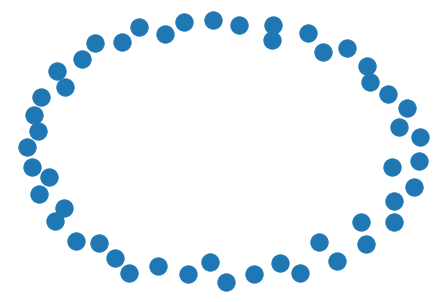

In [74]:
nx.draw(bestguess)

In [75]:
data = df.to_numpy()
instances = {}
for count, label in enumerate(df.columns):
    instances[label] = max(data[:,count])
    
print(instances)

{'N1': 3, 'N2': 2, 'N3': 2, 'N4': 2, 'N48': 2, 'N6': 4, 'N7': 3, 'N14': 4, 'N15': 2, 'N17': 4, 'N49': 3, 'N33': 2, 'N10': 4, 'N34': 4, 'N11': 4, 'N16': 3, 'N27': 4, 'N19': 4, 'N31': 3, 'N32': 4, 'N40': 4, 'N5': 3, 'N12': 2, 'N41': 2, 'N47': 3, 'N8': 2, 'N9': 3, 'N13': 3, 'N24': 4, 'N21': 3, 'N37': 4, 'N44': 2, 'N45': 2, 'N39': 3, 'N18': 4, 'N46': 2, 'N29': 4, 'N36': 3, 'N43': 3, 'N42': 2, 'N20': 3, 'N22': 4, 'N23': 4, 'N30': 3, 'N38': 4, 'N26': 3, 'N28': 3, 'N50': 2, 'N25': 3, 'N35': 4}


In [76]:

def updatecounts(counts, bestguess,thenode):
    x = [thenode]
    
    for node in x: 
        counts[node] = []
        parents = [pred for pred in bestguess.predecessors(node)] 
        #print(parents)
        pcount = 0
        if len(parents) == 0: 
            counts[node].append(np.zeros(instances[node]))
            for i in range(len(df)):
                counts[node][0][df.iloc[i][node]-1] += 1
            continue
        pdic = {}
        pcount = 0


        for i in range(len(df)):
            pinlist = []
            for parent in parents:
                pinlist.append(df.iloc[i][parent])
            pinstantiation = tuple(pinlist)    
            #print(pinstantiation)

            if pinstantiation not in pdic:
                pdic[pinstantiation] = pcount
                pcount += 1
                counts[node].append(np.zeros(instances[node]))
                #print(counts[node])

            #print(pdic[pinstantiation])
            counts[node][pdic[pinstantiation]][df.iloc[i][node]-1] += 1

    return(counts)




In [77]:
def initcounts(bestguess):
    counts = {}
    for node in bestguess: 
        counts[node] = []
        parents = [pred for pred in bestguess.predecessors(node)] 
        #print(parents)
        pcount = 0
        if len(parents) == 0: 
            counts[node].append(np.zeros(instances[node]))
            for i in range(len(df)):
                counts[node][0][df.iloc[i][node]-1] += 1
            continue
        pdic = {}
        pcount = 0


        for i in range(len(df)):
            pinlist = []
            for parent in parents:
                pinlist.append(df.iloc[i][parent])
            pinstantiation = tuple(pinlist)    
            #print(pinstantiation)

            if pinstantiation not in pdic:
                pdic[pinstantiation] = pcount
                pcount += 1
                counts[node].append(np.zeros(instances[node]))
                #print(counts[node])

            #print(pdic[pinstantiation])
            counts[node][pdic[pinstantiation]][df.iloc[i][node]-1] += 1

    return(counts)



In [78]:
print(counts)

{'age': [array([167., 245.,   7.]), array([ 29., 135.,  28.]), array([12.,  5.,  0.]), array([11., 10.,  0.]), array([55., 99., 11.]), array([0., 9., 0.]), array([3., 0., 0.]), array([12.,  5.,  1.]), array([18.,  0.,  0.]), array([12.,  5.,  1.]), array([0., 7., 0.]), array([0., 0., 1.]), array([0., 1., 0.])], 'portembarked': [array([353.,  66.,  72.]), array([127.,  85.,   2.]), array([164.,  17.,   3.])], 'fare': [array([491.,   0.,   0.]), array([194.,  17.,   3.]), array([184.,   0.,   0.])], 'numparentschildren': [array([531.,  18.,   3.]), array([245.,  39.,   7.]), array([11., 10.,  0.]), array([ 7., 11.,  0.]), array([0., 4., 0.]), array([0., 3., 0.])], 'passengerclass': [array([334.,  79.,  97.]), array([115., 132.,  86.]), array([31.,  1.,  0.]), array([4., 2., 1.]), array([7., 0., 0.])], 'sex': [array([300.,  72.]), array([43., 77.]), array([47., 72.]), array([71.,  3.]), array([17., 70.]), array([91.,  6.]), array([6., 0.]), array([ 0., 11.]), array([2., 1.])], 'numsibling

In [79]:
def bayesian_score(bestguess,counts): 
    score = 0 
    for node in bestguess: 
        npinstance = len(counts[node])
        for row in range(npinstance): 
            score += (scipy.special.loggamma(instances[node]) - (scipy.special.loggamma(instances[node] + sum(counts[node][row])))) 
            score += sum([scipy.special.loggamma((1+counts[node][row][r]) - scipy.special.loggamma(1)) for r in range(instances[node])])
    return(score)


In [80]:
def rand_neighbor(G):
    newgraph = copy.deepcopy(G)
    samplenodes = random.sample(list(G.nodes()), 2)
    
    if G.has_edge(samplenodes[0],samplenodes[1]): 
        newgraph.remove_edge(samplenodes[0],samplenodes[1])
    else: 
        newgraph.add_edge(samplenodes[0],samplenodes[1])
        
    return((newgraph, samplenodes[1]))
        

In [81]:
list(bestguess.nodes)

['N1',
 'N2',
 'N3',
 'N4',
 'N48',
 'N6',
 'N7',
 'N14',
 'N15',
 'N17',
 'N49',
 'N33',
 'N10',
 'N34',
 'N11',
 'N16',
 'N27',
 'N19',
 'N31',
 'N32',
 'N40',
 'N5',
 'N12',
 'N41',
 'N47',
 'N8',
 'N9',
 'N13',
 'N24',
 'N21',
 'N37',
 'N44',
 'N45',
 'N39',
 'N18',
 'N46',
 'N29',
 'N36',
 'N43',
 'N42',
 'N20',
 'N22',
 'N23',
 'N30',
 'N38',
 'N26',
 'N28',
 'N50',
 'N25',
 'N35']

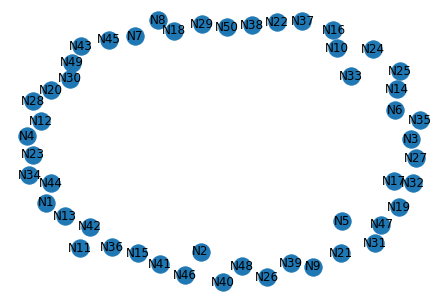

In [82]:
bestguess = nx.DiGraph()
for label in df.columns:
    bestguess.add_node(label)
#bestguess.add_edge("alcohol", "ph")
#bestguess.add_edge("citricacid", "ph")
#bestguess.add_edge("fixedacidity", "ph")
#bestguess.add_edge("sex", "survived")
#bestguess.add_edge("passengerclass","fare")
###bestguess.add_edge("passengerclass","portembarked")
###bestguess.add_edge("passengerclass","numsiblings")
#bestguess.add_edge("passengerclass","age")
#bestguess.add_edge("passengerclass","numparentschildren")###

#for node in bestguess.nodes(): 
    #if node != "sex": 
        #bestguess.add_edge(node, "sex")
        
nx.draw(bestguess,with_labels = True)

In [83]:
k_max = 200
def localgraphsearch(G):
    counts = initcounts(G)
    currscore = bayesian_score(G, counts) 
    for i in range(k_max): 
        print(i)
        tup = rand_neighbor(G)
        Gprime = tup[0]
        augnode = tup[1]
        #nx.draw(Gprime)
        if not(nx.is_directed_acyclic_graph(Gprime)):
            continue
        #print("passed the point of no return")
        countsprime = copy.deepcopy(counts)
        updatecounts(countsprime,Gprime,augnode)
        nextscore = bayesian_score(Gprime,countsprime)
        
        if nextscore > currscore: 
            #print("I reign")
            print(nextscore)
            currscore = nextscore 
            counts = copy.deepcopy(countsprime)
            G = copy.deepcopy(Gprime)
    
    return G

In [84]:
answer = localgraphsearch(bestguess)

0
1
2
3
4
5
6
7
-503782.406231513
8
9
10
-503766.86252481374
11
12
13
-503214.25585739873
14
15
16
-503207.4041495314
17
18
19
20
21
-503038.6847602553
22
23
24
-503018.7487475048
25
-502968.4329202501
26
27
28
29
30
31
32
33
-502962.0762427093
34
35
36
37
38
39
40
41
42
43
44
-501865.4456629193
45
46
47
48
-501845.97009752935
49
50
-501820.1506228909
51
52
53
54
55
56
-501757.55787536677
57
-501744.7052767355
58
59
60
61
-501692.3918454974
62
-501114.3509163266
63
64
65
66
67
68
69
70
71
-499638.04934615234
72
73
74
75
76
77
-499578.28728308564
78
-499306.4964942661
79
80
-498880.8601915514
81
82
-498748.08413278277
83
84
85
86
87
88
89
90
91
92
-498260.9358766539
93
94
95
96
-498254.7595072809
97
98
99
100
101
102
103
104
105
106
107
108
109
-498115.86066867353
110
-498071.3722025297
111
112
113
114
115
-498059.997566844
116
-498057.333278095
117
118
119
120
121
122
123
124
125
126
127
128
-498048.66843456763
129
-498048.2561604002
130
131
-497979.53792339994
132
133
134
135
136
137


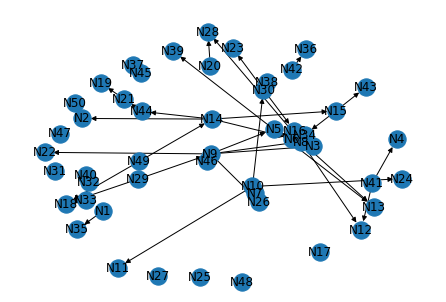

In [85]:
nx.draw(answer,with_labels = True)

In [63]:
bayesian_score(answer, initcounts(answer))

-43256.494213249534

In [20]:
bestguesses = [nx.DiGraph() for i in range(10)]
for i in range(10):
    for label in df.columns:
        bestguesses[i].add_node(label)

answers = []
for i in range(10):
    answers.append(localgraphsearch(bestguesses[i]))


In [22]:
for g in answers: 
    counts = initcounts(g)
    print(bayesian_score(g, counts))

-3826.724327847809
-3805.9887849263014
-3805.108136594954
-3820.0763982806648
-3819.676103149663
-3817.741763129874
-3839.949761577534
-3831.6778344563936
-3822.5341329738394
-3824.582037571583
